In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
advert_df = pd.read_csv(r"C:\Users\Uday\OneDrive\Documents\Programs\DataScience\datasets\Advertising.csv")

In [57]:
advert_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [58]:
advert_df = advert_df.loc[:, ~advert_df.columns.str.contains('^Unnamed')]

In [59]:
advert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
advert_df.fillna(advert_df.mean(numeric_only=True), inplace=True)
advert_df.drop_duplicates(inplace=True)

In [61]:
Q1 = advert_df.quantile(0.25, numeric_only=True)
Q3 = advert_df.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1

advert_df = advert_df[
  ~((advert_df < (Q1 - 1.5 * IQR)) | (advert_df > (Q3 + 1.5 * IQR))).any(axis=1)
]

c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

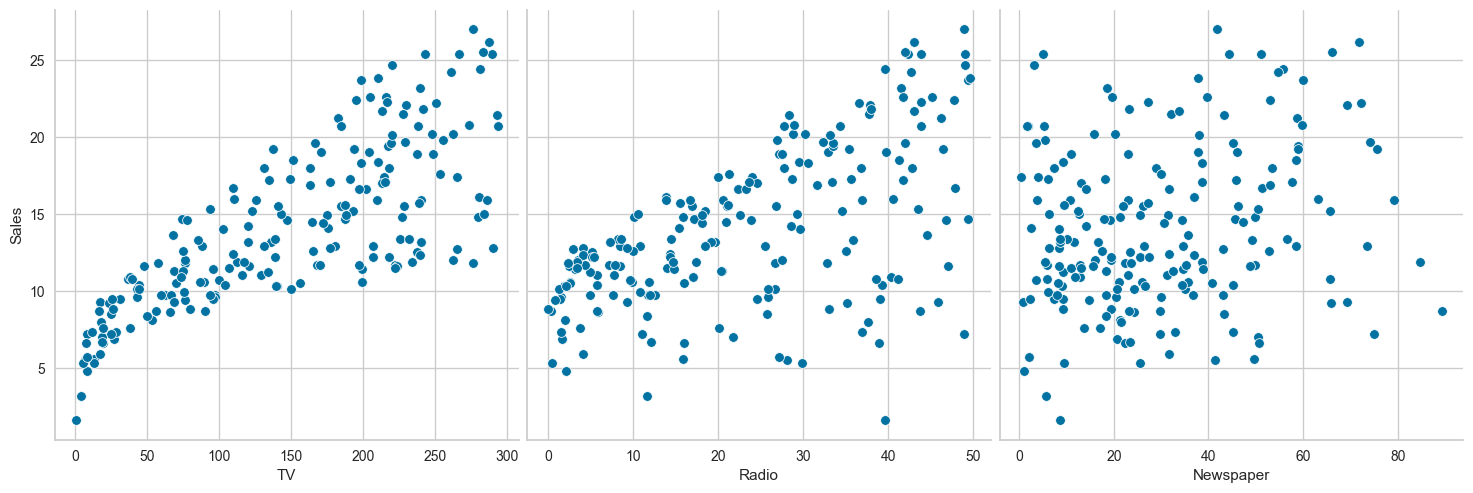

In [62]:
sns.pairplot(
  advert_df,
  x_vars=['TV', 'Radio', 'Newspaper'],
  y_vars=['Sales'],height=5
)

c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

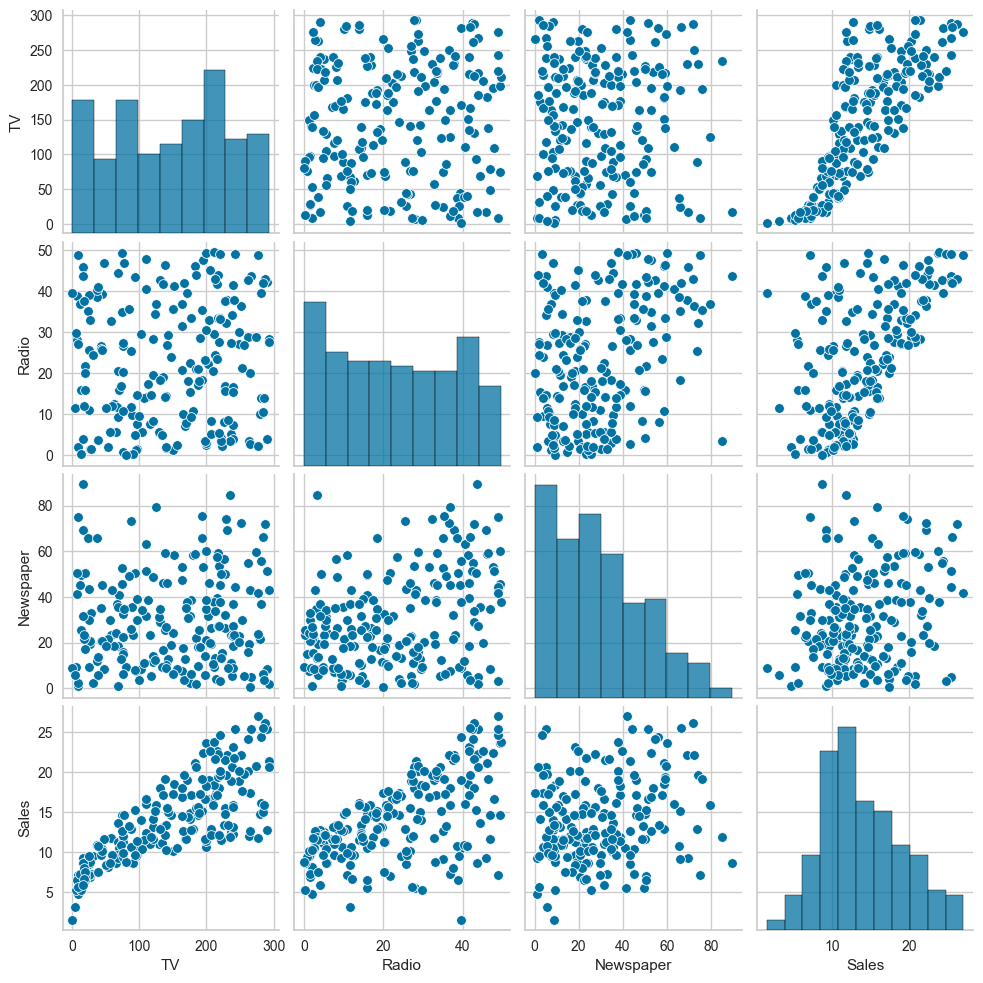

In [63]:
sns.pairplot(advert_df)

c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


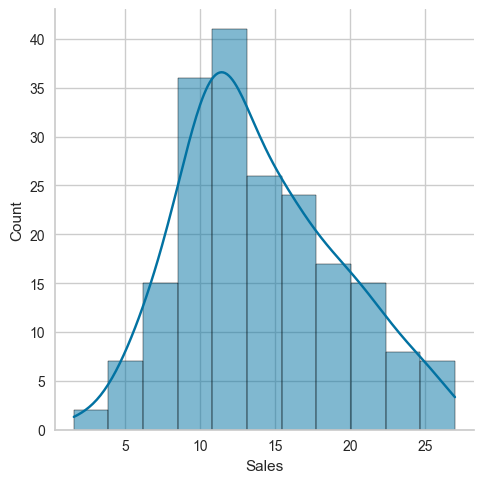

In [64]:
sns.displot(advert_df['Sales'], kde=True)

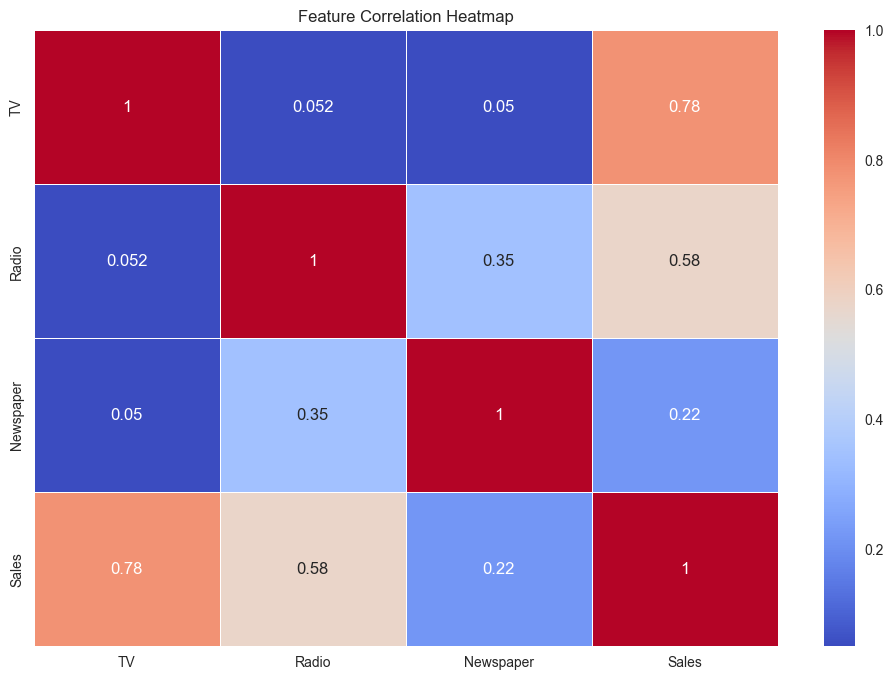

In [65]:
plt.figure(figsize=(12, 8))

sns.heatmap(
  advert_df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5
)
plt.title("Feature Correlation Heatmap")

plt.show()

In [66]:
X = advert_df[['TV', 'Radio', 'Newspaper']]
y = advert_df['Sales']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)

print(linear_model.intercept_)
linear_model.coef_

2.9523085671181786


array([ 0.04569034,  0.18855047, -0.00117766])

In [69]:
list(zip(['TV','Radio','Newspaper'], linear_model.coef_))

[('TV', 0.04569034192457891),
 ('Radio', 0.1885504688581051),
 ('Newspaper', -0.0011776635581814965)]

In [70]:
linear_model_predict = linear_model.predict(X_test)

In [71]:
from sklearn import metrics

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, linear_model_predict))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, linear_model_predict))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, linear_model_predict)))

Mean Absolute Error :  1.2442688638378963
Mean Squared Error :  2.8692296732012026
Root Mean Squared Error :  1.6938800645858025


In [72]:
from sklearn.metrics import r2_score

print("R*2:", r2_score(y_test, linear_model_predict))

R*2: 0.9002377526452715


In [73]:
!pip install yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


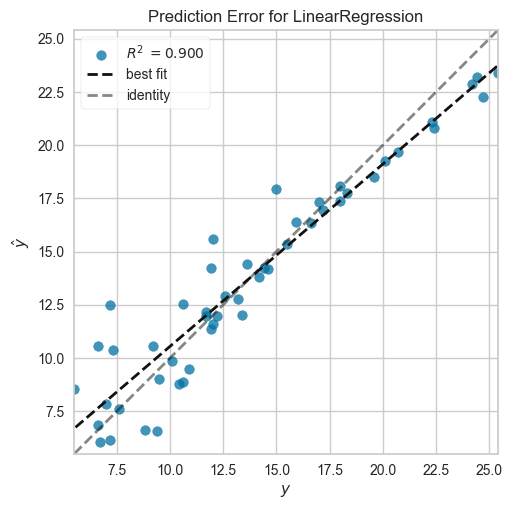

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [74]:
from yellowbrick.regressor import PredictionError

v = PredictionError(linear_model).fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()